# Linear least squares curve fitting

## Summary

Fit a model y(x) to some data points $(y_i,\,x_i)$. There are $m$ total points.

$y(x)$ contains some parameters $\eta$ that appear linearly, so that $y(x)$ has the form

$$y(x;\eta)=f_1(x)\eta_1+f_2(x)\eta_2+\ldots f_n(x)\eta_n,$$

where $f_1(x)$ etc. are some functions of $x$. We want the *best* set of parameters $\eta$, that is, the $\eta$ that will minimize the sum of the square error between the model and that data at each point. 

**The $\eta$ that minimizes the sum square error is given by solving the following for $\eta$:**

<font color='blue'>
$$\hat{A}\eta = \hat{b},$$
</font>

where

$$\hat{A} = A^TA,$$

$$\hat{b} = A^Tb,$$

$$A = \left[
\begin{array}{c c c c}
f_1(x_1) & f_2(x_1) & \ldots & f_n(x_1) \\
f_1(x_2) & f_2(x_2) & \ldots & f_n(x_2) \\
f_1(x_3) & f_2(x_3) & \ldots & f_n(x_3) \\
         & \vdots   &        &          \\
f_1(x_m) & f_2(x_m) & \ldots & f_n(x_m)
\end{array}
\right]
$$

$$b = \left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_m
\end{array}
\right)
$$

## Example

For example $y(x;\vec{\eta}) = y(x; \alpha,\beta,\gamma) = \alpha x^2 + \beta x + \gamma$.

The model can be evaluated at each data point:
\begin{align}
\alpha x_1^2 + \beta x_1 + \gamma &= y_1 \\
\alpha x_2^2 + \beta x_2 + \gamma &= y_2 \\
\alpha x_3^2 + \beta x_3 + \gamma &= y_3 \\
\vdots            &      \\
\alpha x_m^2 + \beta x_m + \gamma &= y_m
\end{align}


This can be rewritten as
$$A\eta = b,$$
or

$$\left[
\begin{array}{c c c}
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
x_3^2 & x_3 & 1 \\
    & \vdots &  \\
x_m^2 & x_m & 1
\end{array}
\right]
\left(
\begin{array}{c}
\alpha \\
\beta \\
\gamma
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_m
\end{array}
\right)
$$

## Detailed formulation

Note that there is no solution to this problem in general. That is, there is no single $\eta$ array that can fit all $m$ data points.

Instead, we find the $\eta$ that minimizes the error between $y(x_i;\eta)$ and $y_i$ in some global sense for all data points $i$.

The error in each point is

$$e_i = y(x_i;\eta)-y_i,$$

or, in matrix form, the error vector is

$$e = A\eta-b.$$

Minimize the square of the length of the error vector. This quantity is the sum square error between the model and the data points:

$$|e|^2 = |A\eta-b|^2 =  (A\eta-b)^T(A\eta-b)$$

Expand this (and use $(A\eta)^T=\eta^TA^T$):

$$|e|^2 = \eta^TA^TA\eta - \eta^TA^Tb - b^TA\eta + b^Tb$$

The third term on the right is $-b^TA\eta = -(A\eta)^Tb = -\eta^TA^Tb$. Combining this with the second term on the right of the above equation gives

$$|e|^2 = \eta^TA^TA\eta - 2\eta^TA^Tb + b^Tb$$

Now, $b^Tb$ is a scalar, so the $\eta$ that minimizes $|e|^2$ will also minimize $|e|^2-b^Tb$. Likewise, the $\eta$ that minimizes $|e|^2-b^Tb$ will also minimize $\frac{1}{2}(|e|^2-b^Tb)$. Let this equal $q$. 
Then minimize $q$:

$$q = \frac{1}{2}\eta^TA^TA\eta - \eta^TA^Tb.$$

Let $\hat{A} = A^TA$ and $\hat{b} = A^Tb$. Then we have:

<font color='blue'>
$$q = \frac{1}{2}\eta^T\hat{A}\eta - \eta^T\hat{b}.$$
</font>

**Consider the case where $\hat{A}$, $\hat{b}$, and $\eta$ are scalars.** Then we would have $q = \frac{1}{2}\hat{A}\eta^2 - \hat{b}\eta$. Minimize $q$ by solving $\frac{dq}{d\eta}=\hat{A}\eta-\hat{b} = 0$. Then the $\eta$ that minimizes the square error is the solution to $\hat{A}\eta=\hat{b}$.
* The multi-dimensional analog (for matrix $\hat{A}$ and vector $\eta$, $\hat{b}$) is given in the equation for $q$ above, and the $\eta$ that minimizes the square error vector will be the solution to 
<font color='blue'>
$$\hat{A}\eta=\hat{b}.$$
</font>
* (This also motivates using the 1/2 factor above.)

**Show that solving $\hat{A}\eta=\hat{b}$ is the same as minimizing $q = \frac{1}{2}\eta^T\hat{A}\eta - \eta^T\hat{b}.$**
* $\hat{A}$ is symmetric and positive definite.
    * $\hat{A}=A^TA$ is symmetric since $A^TA=(A^TA)^T=A^T(A^T)^T=A^TA$
    * A positive definite matrix $M$ has $x^TMx>0$ for all $x\ne 0$.
        * $x^T\hat{A}x = x^TA^TAx = (Ax)^TAx = \|Ax\|^2 > 0$ for all $x\ne 0$.
    * Equivalently, a positive definite matrix $M$ is symmetric with positive eigenvalues so that, for eigenvector $x$ we have $Mx=\lambda x$, $x^TMx = \lambda x^Tx > 0$ for $x\ne 0$ for positive $\lambda$. Also, since eigenvectors of symmetric matricies are mutually orthogonal (not shown), they span the column space of $M$ and any vector $x$ can be written as a linear combination of eigenvectors so that symmetric $M$ with positive $\lambda$ implies $x^TMx > 0$ for all $x\ne 0$, not just for $x$ an eigenvector.
* Rewrite the expression for $q$ above as 
$$q(y) = \frac{1}{2}y^T\hat{A}y - y^T\hat{b}.$$
* The argument is that $q$ is minimum at $y=\eta$, where $\eta$ is the solution to $\hat{A}\eta=\hat{b}$. So, show that $q(y)$ is minimum at $y=\eta$.
    * $q(\eta)$ is minimum if $q(p)-q(\eta)>0$ for all points $p$.
    
\begin{align}
q(p)-q(\eta) &= \frac{1}{2}p^T\hat{A}p - p^T\hat{b} - \frac{1}{2}\eta^T\hat{A}\eta - \eta^T\hat{b} \\
             &= \frac{1}{2}p^T\hat{A}p - \frac{1}{2}p^T\hat{b} - \frac{1}{2}p^T\hat{b} - \frac{1}{2}\eta^T\hat{A}\eta - \eta^T\hat{b}
\end{align}

* Now, add and subtract $\eta^T\hat{A}\eta$, use $\hat{b}=\hat{A}\eta$, and use the symmetry of $\hat{A}$:
    
\begin{align}
q(p)-q(\eta) &= \frac{1}{2}p^T\hat{A}p - \frac{1}{2}p^Tb - \frac{1}{2}p^Tb + \frac{1}{2}\eta^T\hat{A}\eta \\
             &= \frac{1}{2}(p^T\hat{A}p - p^T\hat{A}\eta - \eta^T\hat{A}p + \eta^T\hat{A}\eta) \\
             &=\frac{1}{2}(p-\eta)^T\hat{A}(p-\eta) > 0 \text{ since } \hat{A}\text{ is positive definite}
\end{align}


### Note
* We have $A\eta = b$.
* The error vector is $e = A\eta-b$.
* We multiplied through by $A^T$, set this equal to zero, and solved for $\eta$.
* Note: the vector $A^Te$ is the projection of the error vector $e$ onto the column space of $A$, that is, the space spanned by the columns of $A$.
* When we set $A^Te=0$, we are saying that the error vector $e$ is orthogonal to the hyperplane defined by the column vectors of $A$. 
    * This is a geometric argument for the error being minimized. 
        * The model is capturing as much of the data as possible, so that the error (that "portion" of the data that the model cannot capture), is completely outside of the space of the model. 
        * There is no component of the error vector that is in the model space.
* Consider a two-parameter model. $a_1$ and $a_2$ would be the two column vectors of matrix $A$. See the image below. 
    * In the notation used to define model $y(x)$, $a_1 = f_1(x_1)+f_1(x_2) + \ldots + f_1(x_m)$, and similarly for $a_2$.
        
<img src=http://ignite.byu.edu/che541/lectures/figs/fig_linleastsq.png width=400>

## Example 1

For the given $(T_i,\,R_i)$ data given below, find the best fit values of $k$ and $E$ for the model
$$R(T) = ke^{-E/T}.$$

### Solution
* Linearize by taking the log of both sides:
$$\ln(R) = \ln(k) - E\frac{1}{T}$$
* Let $y_i=\ln(R_i)$ and $x_i=1/T_i$.
* Take $\vec{\eta} = (\ln(k),\,E)$.
* Then $y(x;\eta) = f_1(x)\eta_1 + f_2(x)\eta_2$, where $f_1(x)=1$, and $f_2(x)=-x$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
T = np.array([ 500.0,  650,  800,  950, 1100, 1250, 1400, 1550, 1700, 1850, 2000])
R = np.array([5.06898064e-06, 9.49169460e-05, 5.91159348e-04, 2.78345192e-03,
              4.88059454e-03, 1.62306334e-02, 3.57378985e-02, 2.30324885e-02,
              8.40528066e-02, 1.07758145e-01, 6.39353585e-02])

Optimal parameters: k=2.819, E=6659


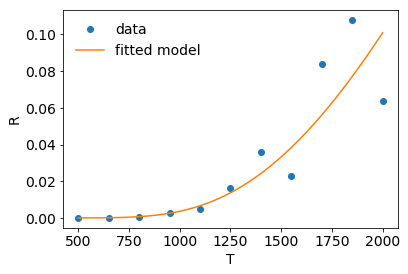

In [3]:
##################### SOLUTION

m = len(T)

#--------- form y and x data

y = np.log(R)
x = 1/T

#--------- form vector b and matrix A, along with bhat and Ahat

b = y

f_1 = np.ones(m)
f_2 = -x
A   = np.column_stack([f_1, f_2])

bhat = np.dot(A.T, b)
Ahat = np.dot(A.T, A)

#--------- solve for η and recover parameters

η = np.linalg.solve(Ahat, bhat)

lnk = η[0]
E   = η[1]

k = np.exp(lnk)

print(f'Optimal parameters: k={k:.3f}, E={E:.0f}')

#-------- plot the model curve versus the data points

TT = np.linspace(np.min(T), np.max(T), 1000)   # lots of T
RR = k*np.exp(-E/TT)                           # model R

plt.rc('font', size=14)
plt.plot(T, R,  'o')
plt.plot(TT,RR, '-')
plt.xlabel('T')
plt.ylabel('R')
plt.legend(['data', 'fitted model'], frameon=False);

## Example 2

Fit the $T$, $R$ data in the previous example to a quartic polynomial:
$$R(T) = aT^4 + bT^3 + cT^2 + dT + e.$$

### Solution

Here, $y$ is just $R$ and $x$ is just $T$. Also, $\vec{\eta}=(a,\,b,\,c,\,d,\,e)$.
* If we write $y(x;\eta) = f_1(x)a + f_2(x)b + f_3(x)c + f_4(x)d + f_5(x)e$, 
    * then $f_1(x)=x^4$, $f_2(x)=x^3$, $f_3(x)=x^2$, $f_4(x)=x$, $f_5(x)=1$.

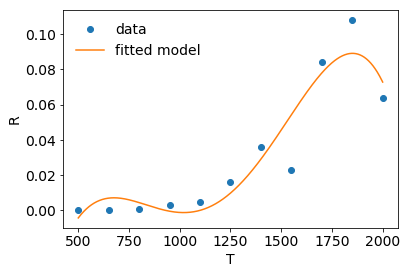

In [4]:
x = T
y = R

#----------------

b = y
f_1 = x**4
f_2 = x**3
f_3 = x**2
f_4 = x
f_5 = np.ones(len(x))

A = np.column_stack([f_1, f_2, f_3, f_4, f_5])

bhat = np.dot(A.T,b)
Ahat = np.dot(A.T,A)

#----------------

η = np.linalg.solve(Ahat, bhat)

a,b,c,d,e = tuple(η)

#----------------

TT = np.linspace(np.min(T), np.max(T), 1000)   # lots of T
RR = a*TT**4 + b*TT**3 + c*TT**2 + d*TT + e

plt.rc('font', size=14)
plt.plot(T, R,  'o')
plt.plot(TT,RR, '-')
plt.xlabel('T')
plt.ylabel('R')
plt.legend(['data', 'fitted model'], frameon=False);

